In [1]:
using GridPotentialFlow
using Plots
using LinearAlgebra

In [2]:
Δx = 0.005
xlim = (-0.5,1.0)
ylim = (-0.7,0.7)
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((308, 288), (104, 144), 0.005, ((-0.515, 1.0150000000000001), (-0.715, 0.715)))

In [3]:
c = 1.0
plate = Plate(c,100)
T = RigidTransform((0.0,0.0),-π/3)
T(plate);

In [4]:
function createsheddedvortices(plate,oldvortices)
    
    if isempty(oldvortices)
        vLE = Vortex(plate.x[1]+3Δt*plate.len*cos(plate.α+π/2),plate.y[1]+3Δt*plate.len*sin(plate.α+π/2),1.0)
        vTE = Vortex(plate.x[end]+3Δt*plate.len*cos(plate.α+π/2),plate.y[end]+3Δt*plate.len*sin(plate.α+π/2),1.0)
    else
        vLE = Vortex(2/3*plate.x[1]+1/3*oldvortices[end-1].x,2/3*plate.y[1]+1/3*oldvortices[end-1].y,0.0)
        vTE = Vortex(2/3*plate.x[end]+1/3*oldvortices[end].x,2/3*plate.y[end]+1/3*oldvortices[end].y,0.0)
    end
    
    return vLE, vTE
end

createsheddedvortices (generic function with 1 method)

In [5]:
model = VortexModel(g,bodies=plate,edges=[1,length(plate)]);

In [6]:
Δt = 2e-2
T = 0:Δt:0.2
u = getvortexpositions(model);

In [7]:
for t in T

    vLE, vTE = createsheddedvortices(plate,model.vortices.list)
    
    pushvortices!(model,vLE,vTE)
    
    Ẋ = computevortexvelocities(model,U∞=(1.0,0.0))
    vortices = deepcopy(model.vortices.list)
    updateposition!.(vortices,Ẋ.u,Ẋ.v,Δt)
    
    setvortices!(model,vortices)
end

In [8]:
ψ = computeψ(model, U∞=(1.0,0.0));

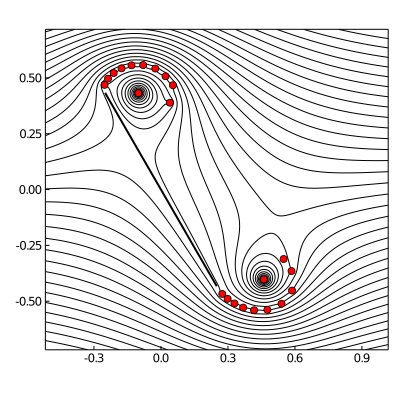

In [9]:
xg,yg = coordinates(ψ,g);
plot(plate,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
scatter!((v->v.x).(model.vortices.list),(v->v.y).(model.vortices.list),color=:red)